# Homework 1

## Part 1: Mortality Prediction in the ICU

The dataset you will use for this homework assignment can be found at the following link: https://drive.google.com/drive/folders/1n-fmx1jS_IWEsUj3EzlZ1qZ0hxqtSnZF?usp=sharing

Please make sure to copy the files to your own google drive folder and substitute the path to that file below to load the dataset.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [187]:
from google.colab import drive

# Will ask for authentication, click allow
drive.mount("/content/drive")

# Enter the correct path here
#------YOUR CODE HERE--------
path_to_data_folder = "/content/drive/My Drive/hst_953_2022_data"
#------YOUR CODE ENDS--------


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the GOSSIS dataset into a pandas dataframe
df = pd.read_csv(os.path.join(path_to_data_folder, "gossis.csv"))
#df
#list(df.columns)
label = "hospital_death"
y = df[[label]]
#list(df.columns)

(a)

In [189]:
#------YOUR CODE HERE--------
# Enter the features corresponding to each category as a list below
# category (a)
# relevant features, all the features other than the ones listed below

# category (b)
irrelevant_features = ["encounter_id", "patient_id", "hospital_id", "icu_id", 
"apache_2_diagnosis", "apache_2_bodysystem", "apache_3j_bodysystem"]

# category (c)
potentially_leaky_features = [
    # "elective_surgery",
    #                           "hospital_admit_source",
    #                           "icu_admit_source",
                              "apache_2_diagnosis",
                              "apache_3j_diagnosis","h1_blood_culture",
                              "h1_urine_culture",
                              "h1_sputum_culture",
                              "h1_serum_immunoglobulins_iga",
                              "h1_serum_immunoglobulins_igg",
"h1_serum_immunoglobulins_igm","h1_anca","h1_serum_complement_total_C3","h1_serum_complement_total_C4",
"d1_medication_name","d1_medication_dosage","d1_medication_name_complete","apache_4a_hospital_death_prob",
"apache_4a_icu_death_prob"]
                      
#------YOUR CODE ENDS--------

# Features to drop: categories (b) and (c)
features_to_drop = irrelevant_features + potentially_leaky_features

# Ground truth labels
label = "hospital_death"

(b)

In [190]:
# Define the dataset and the target variable
X = df.drop(columns=features_to_drop+[label])
y = df[[label]]
# Populate the following list with the names of the binary features
# that you didn't drop from the dataset
#------YOUR CODE HERE--------
remaining_binary_features = ["readmission_status",
"apache_post_operative","arf_apache","gcs_unable_apache","intubated_apache",
"ventilated_apache","aids","cirrhosis","diabetes_mellitus","hepatic_failure",
"immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis"]           
                            
#------YOUR CODE ENDS--------

# Convert binary features into strings
# (to apply a specific preprocessing pipeline to those features later)
for c in remaining_binary_features:
    X[c] = X[c].fillna(-1)
    X[c] = X[c].astype(int)
    X[c] = X[c].astype(str)
    X[c] = X[c].replace("-1", np.nan)

In [197]:
# Preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#------YOUR CODE HERE--------
# Each of the below transformers should be either a preprocessing step
# (i.e. a scaler/encoder/imputer) or a pipeline (chain) of preprocessing
# steps

# For numerical features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                      ('scaler', StandardScaler())])
      #                                ('scaler', StandardScaler())]) # numeric standard scaler

# For categorical features
categorical_transformer = Pipeline(steps=[ #('imputer', SimpleImputer(strategy='most_frequent')), # impute with mode
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # OneHotErrcoder ,sparse=False
                                          

#------YOUR CODE ENDS--------

preprocessing = ColumnTransformer(
    transformers=[
        (
            "num",
            numeric_transformer,
            selector(dtype_exclude=["category", object, "string"]),
        ),
        (
            "cat",
            categorical_transformer,
            selector(dtype_include=["category", object, "string"]),
        ),
    ]
)

preprocessing_pipeline = Pipeline(
    steps=[("preprocessing", preprocessing)]
)

In [198]:
# Split the dataset into an 80%/20% train-test split
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [199]:
# Train the preprocessing pipeline on the train set and apply it on the test set
X_train = preprocessing_pipeline.fit_transform(X_train_raw)  # fit on train set
# extract new feature names
feature_names = list(preprocessing_pipeline[0].transformers_[0][2]) + list(preprocessing_pipeline[0].transformers_[1][1].get_feature_names_out())
print(feature_names)
X_train = pd.DataFrame(X_train, columns=feature_names)  # to dataframe type
# apply preprocessing pipeline to test set
X_test = pd.DataFrame(preprocessing_pipeline.transform(X_test_raw), columns=feature_names)

['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1

(c)

In [204]:
X_train.shape

(73370, 237)

In [121]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
#------YOUR CODE HERE--------
logismod=LogisticRegression(max_iter=1000) # max_iter=100
logismod.fit(X_train,y_train.values.ravel()) 
X_pred=logismod.predict(X_train)
X_pred
#------YOUR CODE ENDS--------

array([0, 1, 0, ..., 0, 0, 0])

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from collections import defaultdict

#------YOUR CODE HERE--------
# Fill out the following function to compute and return the different
# performance metrics of the input model. This is to avoid copying
# the same code to compute the metrics for each model
def evaluate_model(model, X_train, y_train, X_test, y_test, sample_weight=None):
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    # Accuracy
    acc_train=accuracy_score(y_train, y_pred_train)
    acc_test=accuracy_score(y_test, y_pred_test)

    # Precision
    pre_train=precision_score(y_train, y_pred_train,average='macro') 
    pre_test=precision_score(y_test, y_pred_test,average='macro')

    # Recall
    re_train=recall_score(y_train, y_pred_train,average='macro')  # ,average='macro'
    re_test=recall_score(y_test, y_pred_test,average='macro') #,average='macro'

    # F1-score
    fscore_train=f1_score(y_train, y_pred_train,average='macro')    
    fscore_test=f1_score(y_test, y_pred_test,average='macro')

    #AUC score
    auc_train=roc_auc_score(y_train, y_pred_train)
    auc_test=roc_auc_score(y_test, y_pred_test)

    df = {'metric': ['Accuracy', 'Accuracy','Precision', 'Precision','Recall', 'Recall','F1-score', 'F1-score','AUC score','AUC score'],
          'dataset': ['train', 'test', 'train', 'test','train', 'test','train', 'test','train', 'test'],
          'value': [acc_train,acc_test,pre_train,pre_test,re_train,re_test,fscore_train,fscore_test,auc_train,auc_test]}
    row_index = [1,2,3,4,5,6,7,8,9,10]
    col_name=['metric', 'dataset', 'value']
    performance_metric=pd.DataFrame(df,columns=col_name,index=row_index)
    return performance_metric

    pass
#------YOUR CODE ENDS--------

In [124]:
# Use evaluate_model to compute the different performance metrics for your linear regression model
#------YOUR CODE HERE--------
evaluate_logismod=evaluate_model(logismod, X_train, y_train, X_test, y_test, sample_weight=None)
evaluate_logismod
#------YOUR CODE ENDS--------

,metric,dataset,value
1,Accuracy,train,0.927150
2,Accuracy,test,0.924712
3,Precision,train,0.811321
4,Precision,test,0.794771
5,Recall,train,0.636776
6,Recall,test,0.630503
7,F1-score,train,0.682432
8,F1-score,test,0.673466
9,AUC score,train,0.636776
10,AUC score,test,0.630503


(d)

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a random forest
# Use random_state=42 for consistency
#------YOUR CODE HERE--------
rfmod=RandomForestClassifier(random_state=42) 
rfmod.fit(X_train,y_train.values.ravel()) #

#------YOUR CODE ENDS--------

RandomForestClassifier(random_state=42)

In [126]:
# Use evaluate_model to compute the different performance metrics for your random forest
#------YOUR CODE HERE--------
evaluate_rfmod=evaluate_model(rfmod, X_train, y_train, X_test, y_test, sample_weight=None)
evaluate_rfmod
#------YOUR CODE ENDS--------

,metric,dataset,value
1,Accuracy,train,1.000000
2,Accuracy,test,0.929728
3,Precision,train,1.000000
4,Precision,test,0.858149
5,Recall,train,1.000000
6,Recall,test,0.626688
7,F1-score,train,1.000000
8,F1-score,test,0.676629
9,AUC score,train,1.000000
10,AUC score,test,0.626688


In [127]:
import xgboost
# Create and fit an xgboost model
# Use random_state=42 for consistency
#------YOUR CODE HERE--------
xgbmod=xgboost.XGBRFClassifier(random_state=42)
xgbmod.fit(X_train,y_train.values.ravel())

#------YOUR CODE ENDS--------


XGBRFClassifier(random_state=42)

In [128]:
# Use evaluate_model to compute the different performance metrics for your xgboost model
#------YOUR CODE HERE--------
evaluate_xgbmod=evaluate_model(xgbmod, X_train, y_train, X_test, y_test, sample_weight=None)
evaluate_xgbmod
#------YOUR CODE ENDS--------

,metric,dataset,value
1,Accuracy,train,0.921153
2,Accuracy,test,0.922423
3,Precision,train,0.833062
4,Precision,test,0.856629
5,Recall,train,0.563584
6,Recall,test,0.568783
7,F1-score,train,0.590927
8,F1-score,test,0.599285
9,AUC score,train,0.563584
10,AUC score,test,0.568783


(e)

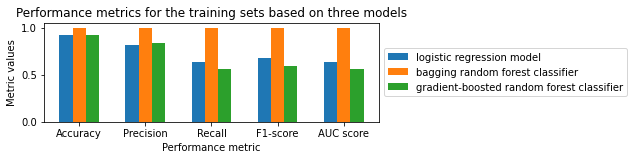

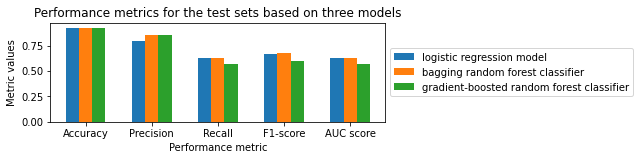

In [129]:
# Plot the performance metrics on a histogram
# You may use any python library of your choice
#------YOUR CODE HERE--------
import matplotlib.pyplot as plt

# Plot on two histograms (one for the training set and one for the test set) the performance metrics you just obtained. 
# Plot the names of the metrics along the x-axis, plot the values of the metrics along the y-axis, 
# and color-code the bars based on their corresponding model.

# for the training set
metric = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
xaxis = np.arange(len(metric))

logis_train=evaluate_logismod[evaluate_logismod.dataset=='train'].value
rf_train = evaluate_rfmod[evaluate_rfmod.dataset=='train'].value
xgb_train=evaluate_xgbmod[evaluate_xgbmod.dataset=='train'].value

plt.subplot(2, 1, 1)
plt.bar(xaxis-0.2, logis_train, width = 0.2, label = 'logistic regression model')
plt.bar(xaxis, rf_train, width = 0.2,label = 'bagging random forest classifier')
plt.bar(xaxis+0.2, xgb_train, width = 0.2,label = 'gradient-boosted random forest classifier')
  
plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the training sets based on three models")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

# for the test set
plt.subplot(2, 1, 2)
logis_test=evaluate_logismod[evaluate_logismod.dataset=='test'].value
rf_test=evaluate_rfmod[evaluate_rfmod.dataset=='test'].value
xgb_test=evaluate_xgbmod[evaluate_xgbmod.dataset=='test'].value

plt.bar(xaxis-0.2, logis_test, width = 0.2, label = 'logistic regression model')
plt.bar(xaxis, rf_test, width = 0.2,label = 'bagging random forest classifier')
plt.bar(xaxis+0.2, xgb_test, width = 0.2,label = 'gradient-boosted random forest classifier')
  
plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the test sets based on three models")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

#------YOUR CODE ENDS--------

(f) (answer this in your report)

(g)

In [132]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
X_train.shape
X_test.shape

(18343, 200)

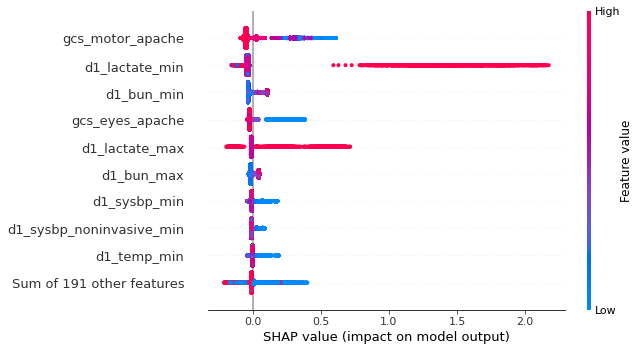

In [133]:
import shap

# Compute and plot the shapley values of the xgboost model on a beeswarm plot
#------YOUR CODE HERE--------
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgbmod)
shap_val = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.beeswarm(shap_val)
#------YOUR CODE ENDS--------

(h)

In [134]:
# Split the test set into cohorts in three different ways
# Remember to split both the input features and the ground truth labels!
#------YOUR CODE HERE--------

# Alternative way
# ifwhite=(X_test_raw['ethnicity']=='Caucasian').to_numpy()
# ifnonwhite=(X_test_raw['ethnicity']!='Caucasian').to_numpy()
# X_test_white = X_test[ifwhite]
# X_test_nonwhite=X_test[ifnonwhite]

X_test_raw1=X_test_raw
X_test_raw1.index=X_test.index # convert the indexes to RangeIndex(start=0, stop=18343, step=1)
# impute and fill the missing values
from statistics import mode
import math
# X_test_raw1["age"]=X_test_raw1["age"].apply(lambda x: np.mean(X_test_raw1["age"]) if math.isnan(x) else x)
X_test_raw1["ethnicity"].fillna(X_test_raw1["ethnicity"].mode()[0], inplace=True)
X_test_raw1["gender"].fillna(X_test_raw1["gender"].mode()[0], inplace=True)
X_test_raw1["age"].fillna(X_test_raw1["age"].mean(), inplace=True)

X_test_raw1.isnull().sum(axis=0)
#X_test_raw.isnull().sum(axis=0)


#white and non-white patients
index_white=X_test_raw1[X_test_raw1.ethnicity=="Caucasian"].index
index_nonwhite=X_test_raw1[X_test_raw1.ethnicity!="Caucasian"].index
X_test_white=X_test.iloc[index_white]
X_test_nonwhite=X_test.iloc[index_nonwhite]
y_test_white=y_test.iloc[index_white]
y_test_nonwhite=y_test.iloc[index_nonwhite]

# Male and female
index_male=X_test_raw1[X_test_raw1.gender=="M"].index
index_female=X_test_raw1[X_test_raw1.gender=="F"].index
X_test_male=X_test.iloc[index_male]
X_test_female=X_test.iloc[index_female]
y_test_male=y_test.iloc[index_male]
y_test_female=y_test.iloc[index_female]

#patients younger than 65 and patients 65 years old or older 
index_young=X_test_raw1[X_test_raw1.age<65].index
index_old=X_test_raw1[X_test_raw1.age>=65].index
X_test_young=X_test.iloc[index_young]
X_test_old=X_test.iloc[index_old]
y_test_young=y_test.iloc[index_young]
y_test_old=y_test.iloc[index_old]
#------YOUR CODE ENDS--------

(i) 

In [137]:
# Compute the performance metrics below
# You may use the evaluate_model function from before
#------YOUR CODE HERE--------
#white and non-white patients
split_white=evaluate_model(xgbmod, X_train, y_train, X_test_white, y_test_white, sample_weight=None)
print('performance metrics for white patients: \n',split_white[split_white.dataset=='test'])
split_nonwhite=evaluate_model(xgbmod, X_train, y_train, X_test_nonwhite, y_test_nonwhite, sample_weight=None)
print('performance metrics for non-white patients: \n',split_nonwhite[split_nonwhite.dataset=='test'])

#male and female patients
split_male=evaluate_model(xgbmod, X_train, y_train, X_test_male, y_test_male, sample_weight=None)
print('performance metrics for male patients: \n',split_male[split_male.dataset=='test'])
split_female=evaluate_model(xgbmod, X_train, y_train, X_test_female, y_test_female, sample_weight=None)
print('performance metrics for female patients: \n',split_female[split_female.dataset=='test'])

#patients younger than 65 and patients 65 years old or older 
split_young=evaluate_model(xgbmod, X_train, y_train, X_test_young, y_test_young, sample_weight=None)
print('performance metrics for patients younger than 65: \n',split_young[split_young.dataset=='test'])
split_old=evaluate_model(xgbmod, X_train, y_train, X_test_old, y_test_old, sample_weight=None)
print('performance metrics for patients 65 years old or older: \n',split_old[split_old.dataset=='test'])

#------YOUR CODE ENDS--------

performance metrics for white patients: 
        metric dataset     value
2    Accuracy    test  0.922097
4   Precision    test  0.860513
6      Recall    test  0.564825
8    F1-score    test  0.593361
10  AUC score    test  0.564825
performance metrics for non-white patients: 
        metric dataset     value
2    Accuracy    test  0.923599
4   Precision    test  0.846469
6      Recall    test  0.583031
8    F1-score    test  0.619641
10  AUC score    test  0.583031
performance metrics for male patients: 
        metric dataset     value
2    Accuracy    test  0.923993
4   Precision    test  0.859141
6      Recall    test  0.570595
8    F1-score    test  0.602359
10  AUC score    test  0.570595
performance metrics for female patients: 
        metric dataset     value
2    Accuracy    test  0.920578
4   Precision    test  0.853661
6      Recall    test  0.566728
8    F1-score    test  0.595765
10  AUC score    test  0.566728
performance metrics for patients younger than 65: 
        m

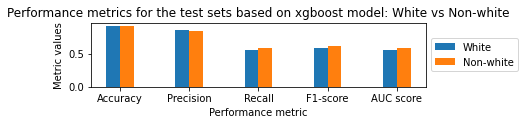

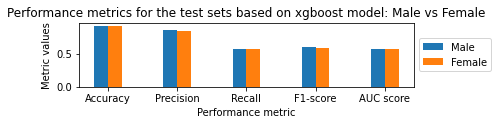

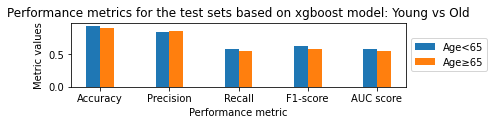

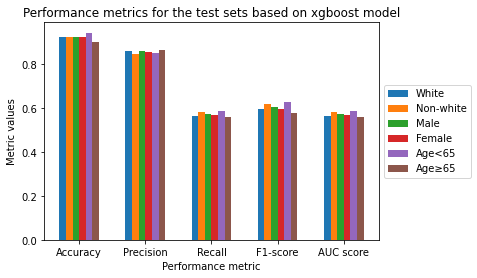

In [138]:
# Plot the performance metrics on a histogram for each of the cohort splits
#------YOUR CODE HERE--------
# white and non-white patients
plt.subplot(3, 1, 1)
xgb_test_white=split_white[split_white.dataset=='test'].value
xgb_test_nonwhite=split_nonwhite[split_nonwhite.dataset=='test'].value

plt.bar(xaxis-0.1, xgb_test_white, width = 0.2, label = 'White')
plt.bar(xaxis+0.1, xgb_test_nonwhite, width = 0.2,label = 'Non-white')
  
plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the test sets based on xgboost model: White vs Non-white")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

# male and female patients
plt.subplot(3, 1, 2)
xgb_test_male=split_male[split_male.dataset=='test'].value
xgb_test_female=split_female[split_female.dataset=='test'].value

plt.bar(xaxis-0.1, xgb_test_male, width = 0.2, label = 'Male')
plt.bar(xaxis+0.1, xgb_test_female, width = 0.2,label = 'Female')
  
plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the test sets based on xgboost model: Male vs Female")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

#patients younger than 65 and patients 65 years old or older 
plt.subplot(3, 1, 3)
xgb_test_young=split_young[split_young.dataset=='test'].value
xgb_test_old=split_old[split_old.dataset=='test'].value

plt.bar(xaxis-0.1, xgb_test_young, width = 0.2, label = 'Age<65')
plt.bar(xaxis+0.1, xgb_test_old, width = 0.2,label = 'Age≥65')
  
plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the test sets based on xgboost model: Young vs Old")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()


plt.bar(xaxis-0.25, xgb_test_white, width = 0.1, label = 'White')
plt.bar(xaxis-0.15, xgb_test_nonwhite, width = 0.1,label = 'Non-white')
plt.bar(xaxis-0.05, xgb_test_male, width = 0.1, label = 'Male')
plt.bar(xaxis+0.05, xgb_test_female, width = 0.1,label = 'Female')
plt.bar(xaxis+0.15, xgb_test_young, width = 0.1, label = 'Age<65')
plt.bar(xaxis+0.25, xgb_test_old, width = 0.1,label = 'Age≥65')

plt.xticks(xaxis, metric)
plt.xlabel("Performance metric")
plt.ylabel("Metric values")
plt.title("Performance metrics for the test sets based on xgboost model")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

#------YOUR CODE ENDS--------

(j) Answer this question in your report

(k)

In [174]:
print(X_test_white.iloc[0])
print(X_test_nonwhite.iloc[0])

print(X_test_male.iloc[0])
print(X_test_female.iloc[0])

print(X_test_young.iloc[0])
print(X_test_old.iloc[0])

age                -0.871196
bmi                 1.019792
height              0.525736
pre_icu_los_days    0.577781
weight              1.262409
                      ...   
x15_1               0.000000
x16_0               1.000000
x16_1               0.000000
x17_0               1.000000
x17_1               0.000000
Name: 2, Length: 200, dtype: float64
age                -0.199688
bmi                -1.062980
height              0.497773
pre_icu_los_days   -0.240766
weight             -0.856499
                      ...   
x15_1               0.000000
x16_0               1.000000
x16_1               0.000000
x17_0               1.000000
x17_1               0.000000
Name: 0, Length: 200, dtype: float64
age                -0.199688
bmi                -1.062980
height              0.497773
pre_icu_los_days   -0.240766
weight             -0.856499
                      ...   
x15_1               0.000000
x16_0               1.000000
x16_1               0.000000
x17_0               1.00000

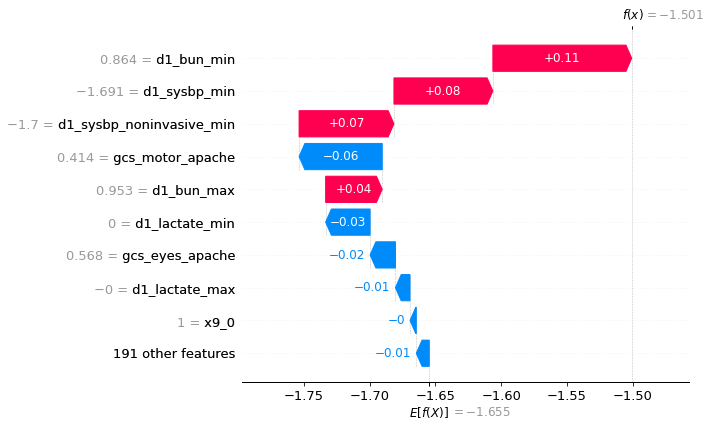

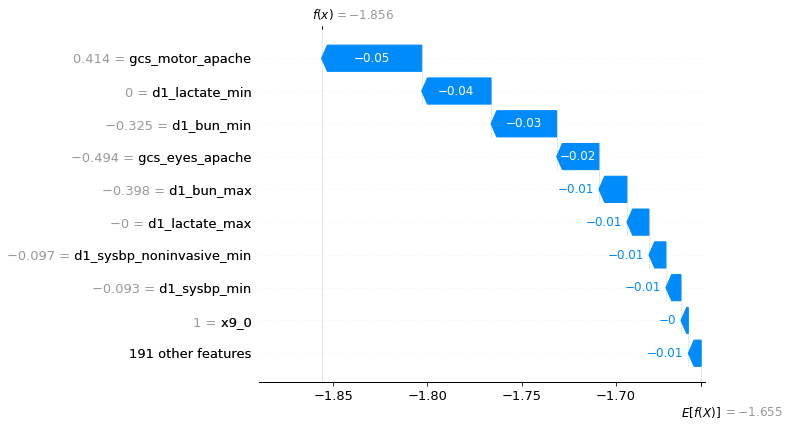

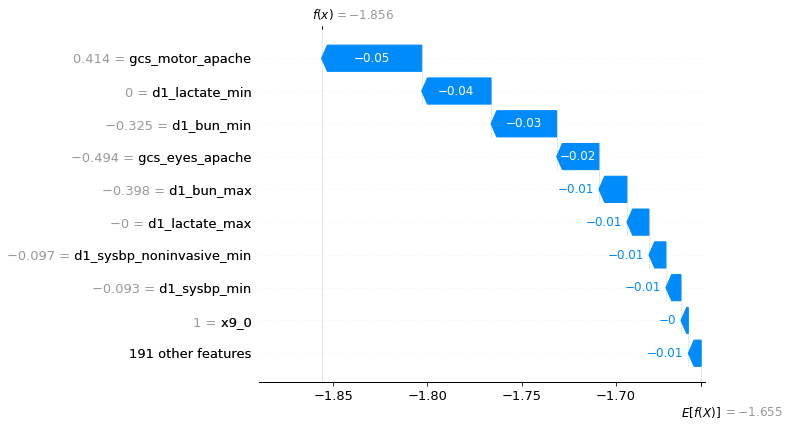

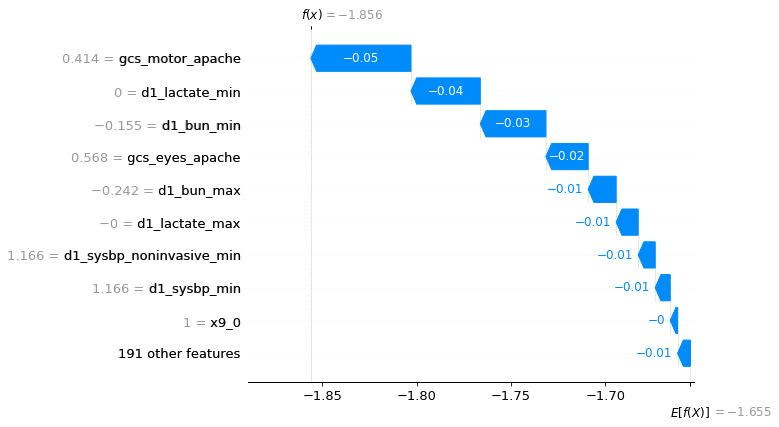

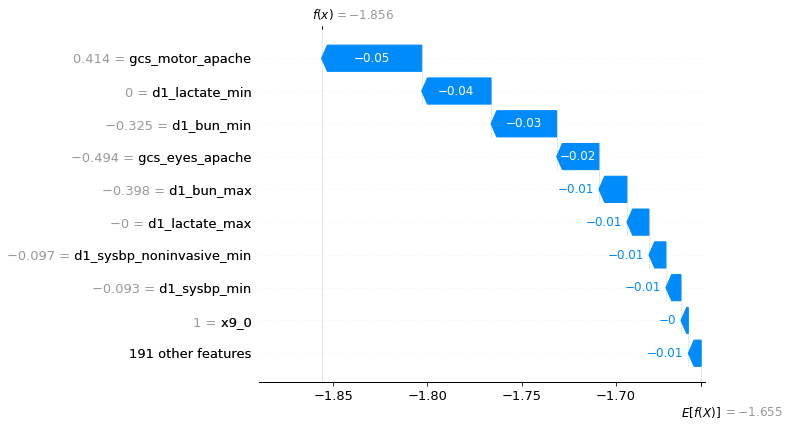

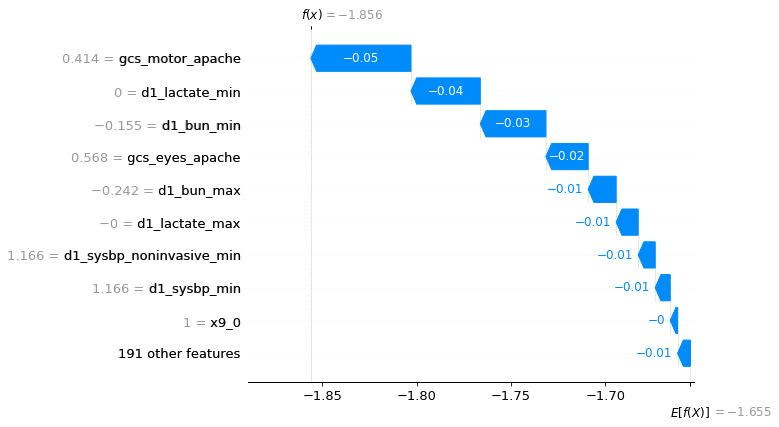

In [139]:
# Visualize the shapley values for the prediction of the first datapoint of each half
# of each split using a waterfall plot
#------YOUR CODE HERE--------
 #select two data points from each cohort and visualize the Shapley values of each data point on a waterfall plot using the shap library.

# white and non-white patients
explainer_w = shap.Explainer(xgbmod)
shap_val_white = explainer_w(X_test_white)
shap.plots.waterfall(shap_val_white[0])

shap_val_nonwhite = explainer_w(X_test_nonwhite)
shap.plots.waterfall(shap_val_nonwhite[0])

# male and female patients
explainer_gender = shap.Explainer(xgbmod)
shap_val_male = explainer_gender(X_test_male)
shap.plots.waterfall(shap_val_male[0])

shap_val_female = explainer(X_test_female)
shap.plots.waterfall(shap_val_female[0])

#patients younger than 65 and patients 65 years old or older 
explainer_age = shap.Explainer(xgbmod)
shap_val_young = explainer_age(X_test_young)
shap.plots.waterfall(shap_val_young[0])

shap_val_old = explainer(X_test_old)
shap.plots.waterfall(shap_val_old[0])
#------YOUR CODE ENDS--------

(l) Answer this question in your report

## Problem 2. Delving into Disparities 

(a) 

In [144]:
# Split the training set into cohorts the same way you split the test set before
#------YOUR CODE HERE--------

# Plot, each on a different pie chart, the distribution of the patients’ genders, ages (bucketed into 5 year intervals), 
# and races for each of the train and test splits (6 pie charts in total). 
# Do you notice any imbalances in the data?

X_train_raw1=X_train_raw
X_train_raw1.index=X_train.index
X_train_raw1["ethnicity"].fillna(X_train_raw1["ethnicity"].mode()[0], inplace=True)
X_train_raw1["gender"].fillna(X_train_raw1["gender"].mode()[0], inplace=True)
X_train_raw1["age"].fillna(X_train_raw1["age"].mean(), inplace=True)

X_train_raw1.isnull().sum(axis=0)

# white and non-white patients
index_white1=X_train_raw1[X_train_raw1.ethnicity=="Caucasian"].index
index_nonwhite1=X_train_raw1[X_train_raw1.ethnicity!="Caucasian"].index
X_train_white=X_train.iloc[index_white1]
X_train_nonwhite=X_train.iloc[index_nonwhite1]
y_train_white=y_train.iloc[index_white1]
y_train_nonwhite=y_train.iloc[index_nonwhite1]



#male and female patients
index_male1=X_train_raw1[X_train_raw1.gender=="M"].index
index_female1=X_train_raw1[X_train_raw1.gender=="F"].index
X_train_male=X_train.iloc[index_male1]
X_train_female=X_train.iloc[index_female1]
y_train_male=y_train.iloc[index_male1]
y_train_female=y_train.iloc[index_female1]

#patients younger than 65 and patients 65 years old or older 
index_young1=X_train_raw1[X_train_raw1.age<65].index
index_old1=X_train_raw1[X_train_raw1.age>=65].index
X_train_young=X_train.iloc[index_young1]
X_train_old=X_train.iloc[index_old1]
y_train_young=y_train.iloc[index_young1]
y_train_old=y_train.iloc[index_old1]

# 5-year interval 
# X_train_0to5=X_train.iloc[X_train_raw1[X_train_raw1.age<5 and X_train_raw1.age>=0].index]
# X_train_5to10=X_train.iloc[X_train_raw1[X_train_raw1.age<10 and X_train_raw1.age>=5].index]
# X_train_10to15=X_train.iloc[X_train_raw1[X_train_raw1.age<15 and X_train_raw1.age>=10].index]
# etc.


Age_dist_train=X_train_raw1

# mean
meanage=np.mean(Age_dist_train["age"])
# Age_dist_train["age"] = Age_dist_train["age"] .replace(np.nan, meanage)
# Age_dist_train["Agecat"]=Age_dist_train["age"].apply(lambda x: math.floor(x/5) if ~math.isnan(x) else x) 
print(max(Age_dist_train["age"]))
print(min(Age_dist_train["age"]))

Age_dist_test=X_test_raw1 # no missing values in 
# meanage=np.mean(Age_dist_test["age"])
Age_dist_test["Agecat"]=Age_dist_test["age"].apply(lambda x: math.floor(x/5) ) # if ~math.isnan(x) else x
Age_dist_train["Agecat"]=Age_dist_train["age"].apply(lambda x: math.floor(x/5) ) 

print(max(Age_dist_test["age"]))
print(min(Age_dist_test["age"]))
#------YOUR CODE ENDS--------

89.0
16.0
89.0
16.0


In [167]:
X_train_raw1.Agecat

AttributeError: ignored

In [162]:
X_train_raw.drop(["Agecat"],axis=1,inplace=True)
X_test_raw.drop(["Agecat"],axis=1,inplace=True)

In [156]:
# train
print(len(X_train_white)/len(X_train)) # white percentage
print(len(X_train_nonwhite)/len(X_train)) # non-white percentage

race_percent=X_train_raw1["ethnicity"].value_counts().sort_index()
print(race_percent) #age percentages
race_percent1=X_test_raw1["ethnicity"].value_counts().sort_index()
print(race_percent1)

print(len(X_train_male)/len(X_train)) 
print(len(X_train_female)/len(X_train))
age_percent=Age_dist_train["Agecat"].value_counts().sort_index()
print(age_percent) #age percentages
age_percent1=Age_dist_test["Agecat"].value_counts().sort_index()
print(age_percent1)




0.786629412566444
0.21337058743355594
African American     7572
Asian                 899
Caucasian           57715
Hispanic             3026
Native American       645
Other/Unknown        3513
Name: ethnicity, dtype: int64
African American     1975
Asian                 230
Caucasian           14364
Hispanic              770
Native American       143
Other/Unknown         861
Name: ethnicity, dtype: int64
0.5395529507973286
0.4604470492026714
3       604
4      1522
5      1684
6      1972
7      2151
8      2682
9      3827
10     5819
11     6953
12    11036
13     8370
14     8114
15     7480
16     6482
17     4674
Name: Agecat, dtype: int64
3      168
4      378
5      419
6      425
7      528
8      715
9      937
10    1423
11    1723
12    2755
13    2119
14    2042
15    1827
16    1647
17    1237
Name: Agecat, dtype: int64


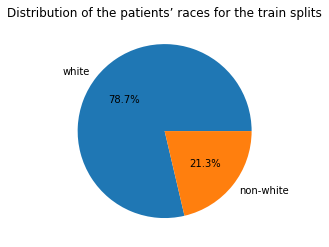

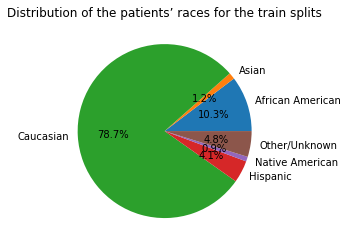

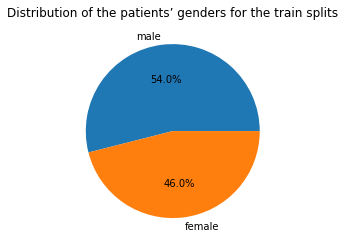

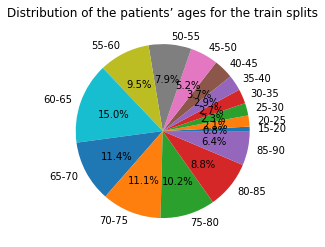

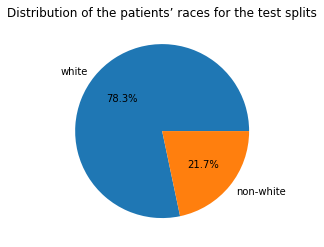

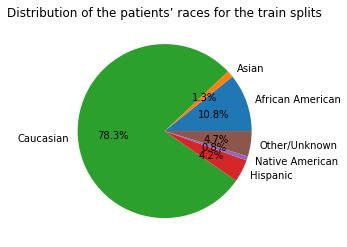

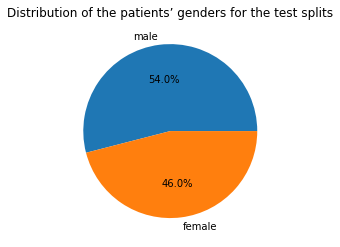

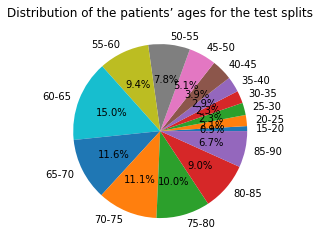

In [ ]:
# Plot the distributions, each on a different pie chart
#------YOUR CODE HERE--------
# the distribution of the patients’ genders, ages (buck- eted into 5 year intervals), and races for each of the train and test splits

# for the train sets
# - white and non-white patients
y1 = np.array([len(X_train_white)/len(X_train),len(X_train_nonwhite)/len(X_train)])
race_labels1 = ["white", "non-white"]

plt.pie(y1, labels = race_labels1,autopct='%1.1f%%')
plt.title('Distribution of the patients’ races for the train splits')
plt.show() 


y1 = np.array(race_percent)
race_labels2 = ["African American","Asian", "Caucasian","Hispanic","Native American","Other/Unknown"]
plt.pie(y1, labels = race_labels2, autopct='%1.1f%%')
plt.title('Distribution of the patients’ races for the train splits')
plt.show() 


# - male and female patients
y2 = np.array([len(X_train_male)/len(X_train),len(X_train_female)/len(X_train)])
gender_labels = ["male", "female"]

plt.pie(y2, labels = gender_labels,autopct='%1.1f%%')
plt.title('Distribution of the patients’ genders for the train splits')
plt.show() 

# - patients age: 5-year Interval
y3 = np.array(age_percent)
age_labels = ["15-20","20-25", "25-30","30-35","35-40","40-45","45-50","50-55","55-60",
              "60-65", "65-70","70-75","75-80","80-85","85-90"]
plt.pie(y3, labels = age_labels, autopct='%1.1f%%')
plt.title('Distribution of the patients’ ages for the train splits')
plt.show() 

# for the test sets
# - white and non-white patients
y11 = np.array([len(X_test_white)/len(X_test),len(X_test_nonwhite)/len(X_test)])
plt.pie(y11, labels = race_labels1,autopct='%1.1f%%')
plt.title('Distribution of the patients’ races for the test splits')
plt.show() 


y11 = np.array(race_percent1)
plt.pie(y11, labels = race_labels2, autopct='%1.1f%%')
plt.title('Distribution of the patients’ races for the train splits')
plt.show() 



# - male and female patients
y22 = np.array([len(X_test_male)/len(X_test),len(X_test_female)/len(X_test)])
plt.pie(y22, labels = gender_labels, autopct='%1.1f%%')
plt.title('Distribution of the patients’ genders for the test splits')
plt.show() 

# - patients age: 5-year Interval
y33 = np.array(age_percent1)
age_labels = ["15-20","20-25", "25-30","30-35","35-40","40-45","45-50","50-55","55-60",
              "60-65", "65-70","70-75","75-80","80-85","85-90"]
plt.pie(y33, labels = age_labels, autopct='%1.1f%%')
plt.title('Distribution of the patients’ ages for the test splits')
plt.show() 

#------YOUR CODE ENDS--------

(b) 

In [165]:
def drop_rows_criteria(df: pd.DataFrame,
                       outcome: pd.DataFrame,
                       pct_drop: float) -> pd.DataFrame:
    """
    Return two new versions of a dataset and the corresponding outcome
    without some rows based on a certain criteria
    (to change in the code of this function)

    Args:
        df (pd.DataFrame): initial dataset, pandas DataFrame format
        outcome (pd.DataFrame): outcome dataset, pandas DataFrame format
        pct_drop (float): percentage of chance to drop a value
            if a certain criteria is met

    Returns:
        pd.DataFrame: modified dataset
        pd.DataFrame: modified outcome
    
    Example:
        X_train_raw2, y_train2 = drop_rows_criteria(X_train_raw, y_train)
    """
    df2 = df.copy(deep=True).reset_index(drop=True)  # work on a copy of the dataframe
    outcome2 = outcome.copy(deep=True).reset_index(drop=True)
    indices_to_drop = []

    # Local rng for better reproducibility
    rng = np.random.default_rng(seed=42)
    for i in range(len(df2)):
        if df2.iat[i, df2.columns.get_loc("gender")] != "M":

            if rng.random() < pct_drop:  # pct_drop chance to drop this row
                indices_to_drop.append(i)
    df2.drop(indices_to_drop, axis=0, inplace=True)
    outcome2.drop(indices_to_drop, axis=0, inplace=True)
    return df2, outcome2

In [169]:
#X_train_raw2.Agecat
X_train_raw1.Agecat

AttributeError: ignored

In [166]:
from tqdm import tqdm

report = {}
percentages = [0.2, 0.4, 0.6, 0.8]
for pct in tqdm(percentages):

    # Use drop_rows_criteria to drop pct% of the training data
    #------YOUR CODE HERE--------
    X_train_raw2, y_train2 = drop_rows_criteria(X_train_raw, y_train, pct) 
    #------YOUR CODE ENDS--------
    
    # Create a fresh preprocessing pipeline
    preprocessing_pipeline2 = Pipeline(
        steps=[("preprocessing", preprocessing)]
    )

    # Fit the preprocessing pipeline to the new training set and store the
    # normalized version of that set in X_train2
    # (Question to think about: why should we do this?)
    #------YOUR CODE HERE--------
    X_train2 = preprocessing_pipeline2.fit_transform(X_train_raw2) 
    #------YOUR CODE ENDS--------

    # Extract new feature names
    features_names = list(preprocessing_pipeline2[0].transformers_[0][2]) + list(preprocessing_pipeline2[0].transformers_[1][1][1].get_feature_names_out())
    X_train2 = pd.DataFrame(X_train2, columns=features_names)  # to dataframe type
    X_test2 = pd.DataFrame(preprocessing_pipeline2.transform(X_test_raw), columns=features_names)

    # Split the new test data (X_test2) into male and female cohorts
    #------YOUR CODE HERE--------  
    index_male2=X_test2[X_test2.x1_M==1].index
    index_female2=X_test2[X_test2.x1_F==1].index
    X_test2_male=X_test2.iloc[index_male2]
    X_test2_female=X_test2.iloc[index_female2]
    y_test2_male=y_test.iloc[index_male2]
    y_test2_female=y_test.iloc[index_female2]
    #------YOUR CODE ENDS--------

    # Create, fit, and evaluate your model
    # You may use evaluate_model from before
    #------YOUR CODE HERE--------
    xgbmod2=xgboost.XGBRFClassifier(random_state=42)
    xgbmod2.fit(X_train2,y_train2.values.ravel())

    # performance metrics for the modified training set and for the original test set
    eva_all=evaluate_model(xgbmod2, X_train2, y_train2, X_test, y_test, sample_weight=None)
    eva_all["subpopulation"]="all"

    #performance metrics on each of the male and female cohorts. 
    eva_male=evaluate_model(xgbmod2, X_train2, y_train2, X_test2_male, y_test2_male, sample_weight=None)
    eva_male["subpopulation"]="male"

    eva_female=evaluate_model(xgbmod2, X_train2, y_train2, X_test2_female, y_test2_female, sample_weight=None)
    eva_female["subpopulation"]="female"

    eva_allpopu=pd.concat([eva_all, eva_male, eva_female], keys=["all","male","female"])
    eva_allpopu["percentage"]=pct
    
    report=pd.DataFrame(report)
    report=pd.concat([report,eva_allpopu])

print(report)
    
    #------YOUR CODE ENDS--------

100%|██████████| 4/4 [01:55<00:00, 28.94s/it]

              metric dataset     value subpopulation  percentage
all    1    Accuracy   train  0.921663           all         0.2
       2    Accuracy    test  0.921932           all         0.2
       3   Precision   train  0.839997           all         0.2
       4   Precision    test  0.841913           all         0.2
       5      Recall   train  0.562932           all         0.2
...              ...     ...       ...           ...         ...
female 6      Recall    test  0.563303        female         0.8
       7    F1-score   train  0.584039        female         0.8
       8    F1-score    test  0.590372        female         0.8
       9   AUC score   train  0.558798        female         0.8
       10  AUC score    test  0.563303        female         0.8

[120 rows x 5 columns]


In [168]:
report


metric dataset     value subpopulation  percentage
all    1    Accuracy   train  0.921663           all         0.2
       2    Accuracy    test  0.921932           all         0.2
       3   Precision   train  0.839997           all         0.2
       4   Precision    test  0.841913           all         0.2
       5      Recall   train  0.562932           all         0.2
...              ...     ...       ...           ...         ...
female 6      Recall    test  0.563303        female         0.8
       7    F1-score   train  0.584039        female         0.8
       8    F1-score    test  0.590372        female         0.8
       9   AUC score   train  0.558798        female         0.8
       10  AUC score    test  0.563303        female         0.8

[120 rows x 5 columns]